### Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
import warnings
import time
import matplotlib.cm as cm
from esda.moran import Moran
from libpysal.weights import Queen, KNN
import seaborn
import geopandas

warnings.filterwarnings("ignore")
plt.rcParams["figure.autolayout"] = True


In [3]:
crash_result = pd.read_csv("crash_result.csv")

In [8]:
crash_pca = crash_result.copy()

###  1 silhouette scores

In [15]:
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

In [7]:
# Double-checking the correct number of clusters is chosen using silhouette scores

for i in range(2,7):
    labels=cluster.KMeans(n_clusters=i,init="k-means++",random_state=200).fit(crash_pca).labels_
    print ("Silhouette score for k(clusters) = "+str(i)+" is "
           +str(metrics.silhouette_score(crash_pca,labels,metric="euclidean",sample_size=1000,random_state=200)))

Silhouette score for k(clusters) = 2 is 0.3701319019934252
Silhouette score for k(clusters) = 3 is 0.26360700555380845
Silhouette score for k(clusters) = 4 is 0.2770791432462045
Silhouette score for k(clusters) = 5 is 0.20615156461955375
Silhouette score for k(clusters) = 6 is 0.2088916182459402


In [8]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=200).fit(crash_pca) for k in range(2,7)]

silhouette_scores = [silhouette_score(crash_pca, model.labels_)
                    for model in kmeans_per_k[0:]]
silhouette_scores

[0.3690989322657201,
 0.2651939103719767,
 0.27749537995460277,
 0.2028989580167237,
 0.20970234772998403]

In [37]:
kmeans_per_k[0:]

[KMeans(n_clusters=2, random_state=200),
 KMeans(n_clusters=3, random_state=200),
 KMeans(n_clusters=4, random_state=200),
 KMeans(n_clusters=5, random_state=200),
 KMeans(n_clusters=6, random_state=200)]

k= 2   0.3690989322657201
k= 3   0.2651939103719767
k= 4   0.27749537995460277
k= 5   0.2028989580167237


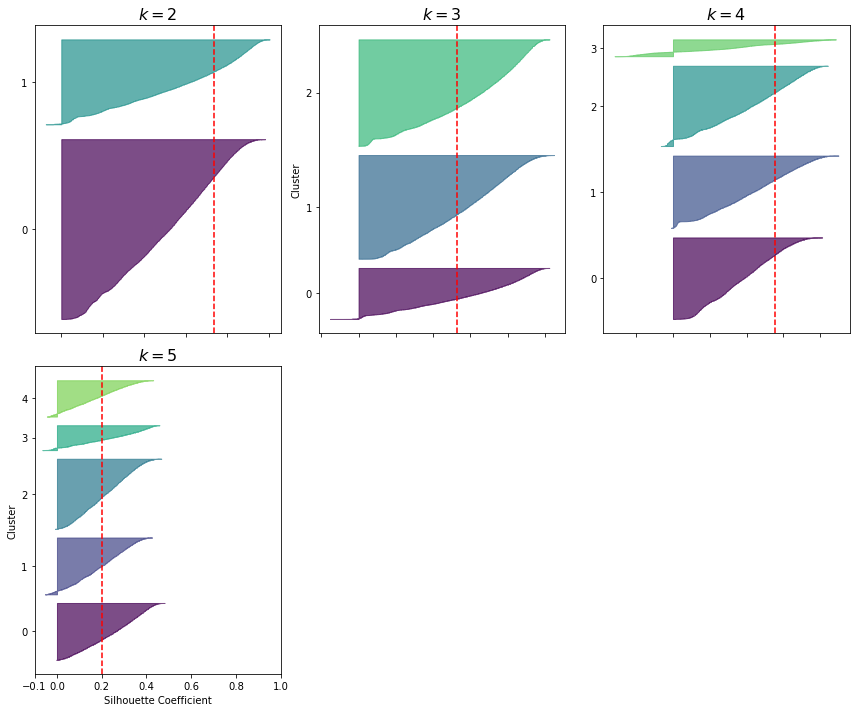

In [39]:
import matplotlib as mpl
plt.figure(figsize=(12,10))

for k in (2,3,4,5):
    plt.subplot(2,3,k-1)
    
    y_pred = kmeans_per_k[k-1].labels_
    silhouette_coefficients = silhouette_samples(crash_pca, y_pred)
    
    padding = len(crash_pca)//30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()
        
        color = mpl.cm.viridis(i/k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                         facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs)//2)
        pos += len(coeffs) + padding
        
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3,5):
        plt.ylabel('Cluster')
        
    if k in(5,6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel('Silhouette Coefficient')
        
    else:
        plt.tick_params(labelbottom=False)
        
    plt.axvline(x=silhouette_scores[k-2], color='red', linestyle='--')
    print('k=',k,' ',silhouette_scores[k-2])
    plt.title('$k={}$'.format(k), fontsize=16)
    
plt.show()

### 2 Elbow  Plot

In [64]:
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

In [65]:
wss = [] # Inertia

K=range(1,12)

for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(crash_pca)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)
    
mycenters = pd.DataFrame({'Clusters' : K, 'WSS' : wss})

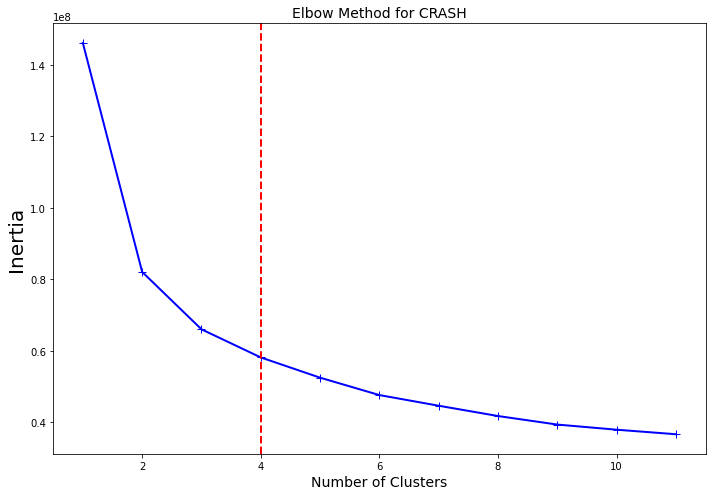

In [66]:
# Using elbow method to select the correct number of clusters for PEOPLE
_ = plt.figure(figsize = (10,7))
_ = plt.plot(range(1,12), wss, linewidth = 2, color = 'blue', marker='+', markersize = 8)
_ = plt.title('Elbow Method for CRASH', fontsize = 14)
_ = plt.xlabel('Number of Clusters',fontsize = 14)
_ = plt.ylabel('Inertia',fontsize = 20)

n_clusters = 4

_ = plt.axvline(x = n_clusters, linewidth = 2, color = 'red', linestyle = '--')
_ = plt.show()

### 3 Face Plot (crash) K=4

In [6]:
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

In [80]:
crash_pca

,TRAFFICWAY_TYPE,FIRST_CRASH_TYPE,TRAFFIC_CONTROL_DEVICE,AGE,CRASH_MONTH,CRASH_DAY_OF_WEEK,CRASH_HOUR,NUM_UNITS,POSTED_SPEED_LIMIT,ROAD_DEFECT,ROADWAY_SURFACE_COND,LIGHTING_CONDITION,WEATHER_CONDITION,DEVICE_CONDITION,ALIGNMENT,STREET_DIRECTION
0,8,0,2,35,3,2,14,2,30,1,1,1,1,1,0,1
1,1,1,1,35,9,4,8,2,30,1,1,1,1,2,0,1
2,1,1,2,62,7,6,0,2,30,0,1,2,1,0,0,1
3,2,2,2,35,8,2,11,2,30,1,1,1,1,1,0,1
4,1,2,2,53,7,6,18,2,30,1,1,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671652,1,1,3,21,10,7,20,2,30,0,0,0,0,1,0,1
671653,1,0,2,16,10,1,20,2,30,1,1,2,1,2,0,1
671654,2,3,3,73,10,2,9,2,30,1,3,1,2,1,0,1
671655,8,11,1,47,10,2,8,2,30,1,3,1,2,2,0,1


In [21]:
crash_pca.columns

Index(['TRAFFICWAY_TYPE', 'FIRST_CRASH_TYPE', 'TRAFFIC_CONTROL_DEVICE',
       'DRIVER_AGE', 'DRIVER_SEX', 'CRASH_MONTH', 'CRASH_DAY_OF_WEEK',
       'CRASH_HOUR', 'NUM_UNITS', 'POSTED_SPEED_LIMIT', 'ROAD_DEFECT',
       'ROADWAY_SURFACE_COND', 'LIGHTING_CONDITION', 'WEATHER_CONDITION',
       'DEVICE_CONDITION', 'ALIGNMENT', 'STREET_DIRECTION', 'k2cls'],
      dtype='object')

In [16]:
kmeans = cluster.KMeans(n_clusters=4)
k2cls = kmeans.fit(crash_pca)

In [17]:
crash_pca['k2cls'] = k2cls.labels_

In [18]:
k2sizes = crash_pca.groupby('k2cls').size()
k2sizes

k2cls
0     98012
1    204540
2     30397
3    199248
dtype: int64

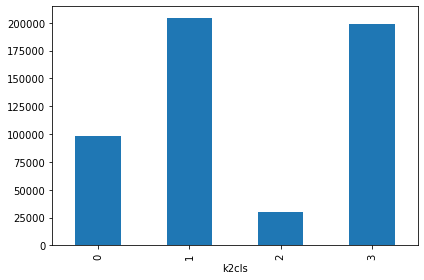

In [19]:
_ = k2sizes.plot.bar()

In [22]:
# Group table by cluster label, keep the variables used 
# for clustering, and obtain their mean
clustering_var = ['DRIVER_AGE','DRIVER_SEX','CRASH_MONTH', 'CRASH_DAY_OF_WEEK', 'CRASH_HOUR', 'NUM_UNITS',
       'ROAD_DEFECT', 'ROADWAY_SURFACE_COND', 'TRAFFICWAY_TYPE',
       'FIRST_CRASH_TYPE', 'POSTED_SPEED_LIMIT', 'LIGHTING_CONDITION',
       'WEATHER_CONDITION', 'DEVICE_CONDITION', 'TRAFFIC_CONTROL_DEVICE',
       'ALIGNMENT', 'STREET_DIRECTION']

k2means =crash_pca.groupby('k2cls')[clustering_var].mean()
k2means.T.round(3)

k2cls,0,1,2,3
DRIVER_AGE,61.596,27.876,38.257,43.263
DRIVER_SEX,0.687,0.782,0.810,0.719
CRASH_MONTH,6.784,6.741,6.577,6.746
CRASH_DAY_OF_WEEK,4.156,4.143,4.124,4.157
CRASH_HOUR,13.414,13.456,13.044,13.375
NUM_UNITS,1.999,2.049,1.946,2.063
ROAD_DEFECT,0.859,0.855,0.851,0.859
ROADWAY_SURFACE_COND,1.268,1.328,1.268,1.311
TRAFFICWAY_TYPE,4.118,4.308,3.048,4.284
FIRST_CRASH_TYPE,3.070,2.989,3.677,2.938


In [23]:
# Group table by cluster label, keep the variables used 
# for clustering, and obtain their descriptive summary


k2desc = crash_pca.groupby('k2cls')[clustering_var].describe()
# Loop over each cluster and print a table with descriptives
for cluster in k2desc.T:
    print('\n\t---------\n\tCluster %i'%cluster)
    print(k2desc.T[cluster].unstack())


	---------
	Cluster 0
                          count       mean       std   min   25%   50%   75%  \
DRIVER_AGE              98012.0  61.595723  7.476052  52.0  56.0  60.0  66.0   
DRIVER_SEX              98012.0   0.687069  0.756015   0.0   0.0   1.0   1.0   
CRASH_MONTH             98012.0   6.783669  3.385470   1.0   4.0   7.0  10.0   
CRASH_DAY_OF_WEEK       98012.0   4.156195  1.900086   1.0   3.0   4.0   6.0   
CRASH_HOUR              98012.0  13.413653  4.594353   0.0  10.0  14.0  17.0   
NUM_UNITS               98012.0   1.999184  0.395358   1.0   2.0   2.0   2.0   
ROAD_DEFECT             98012.0   0.858987  0.398419   0.0   1.0   1.0   1.0   
ROADWAY_SURFACE_COND    98012.0   1.267906  0.807175   0.0   1.0   1.0   1.0   
TRAFFICWAY_TYPE         98012.0   4.118241  2.136081   1.0   2.0   5.0   5.0   
FIRST_CRASH_TYPE        98012.0   3.069838  2.919294   0.0   1.0   3.0   4.0   
POSTED_SPEED_LIMIT      98012.0  28.714882  5.512889   0.0  30.0  30.0  30.0   
LIGHTING_CONDITIO

In [24]:
# Index db on cluster ID
tidy_db = crash_pca.set_index('k2cls')
# Keep only variables used for clustering
tidy_db = tidy_db[clustering_var]
# Stack column names into a column, obtaining 
# a "long" version of the dataset
tidy_db = tidy_db.stack()
# Take indices into proper columns
tidy_db = tidy_db.reset_index()
# Rename column names
tidy_db = tidy_db.rename(columns={
                        'level_1': 'Attribute', 
                        0: 'Values'})
# Check out result
tidy_db.head()

,k2cls,Attribute,Values
0,3,DRIVER_AGE,51
1,3,DRIVER_SEX,2
2,3,CRASH_MONTH,11
3,3,CRASH_DAY_OF_WEEK,2
4,3,CRASH_HOUR,13


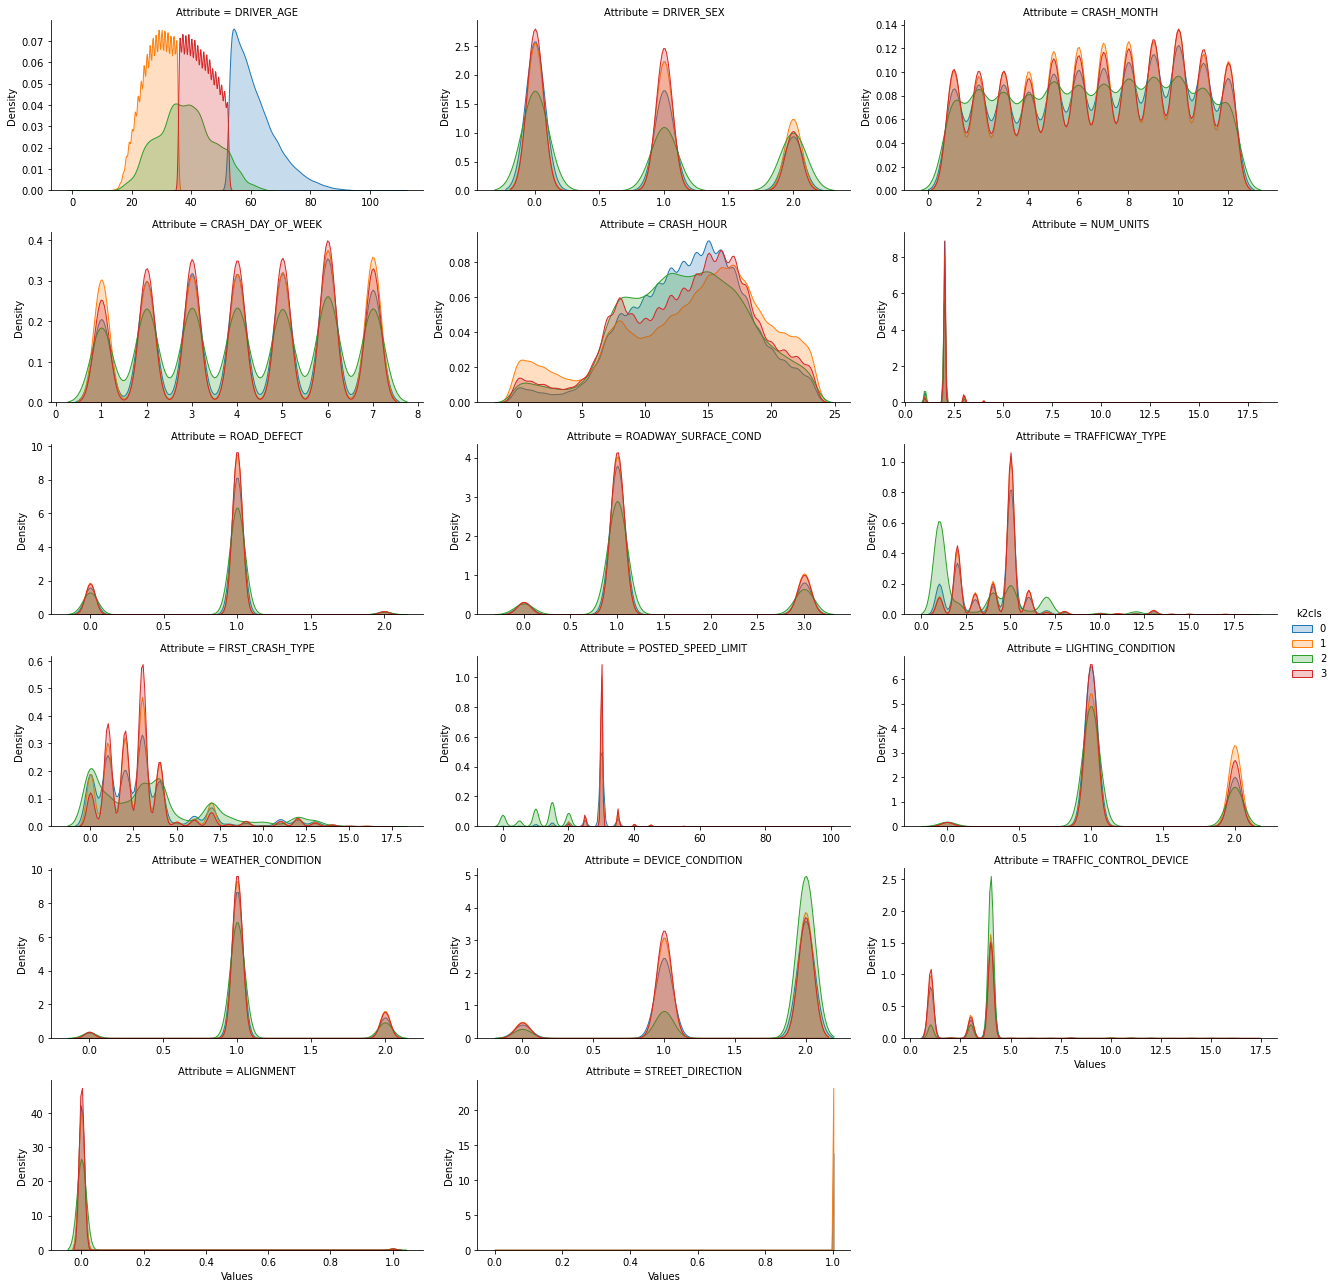

In [26]:
# face plot K=4
import seaborn
# Setup the facets
facets = seaborn.FacetGrid(data=tidy_db, col='Attribute', hue='k2cls', \
                  sharey=False, sharex=False, aspect=2, col_wrap=3)
# Build the plot from `sns.kdeplot`
_ = facets.map(seaborn.kdeplot, 'Values', shade=True).add_legend()


### 3 Face Plot (crash) K=3

In [12]:
kmeans = cluster.KMeans(n_clusters=3)
k2cls = kmeans.fit(crash_pca)

In [13]:
crash_pca['k2cls'] = k2cls.labels_

In [14]:
k2sizes = crash_pca.groupby('k2cls').size()
k2sizes

k2cls
0    206793
1    216814
2    108590
dtype: int64

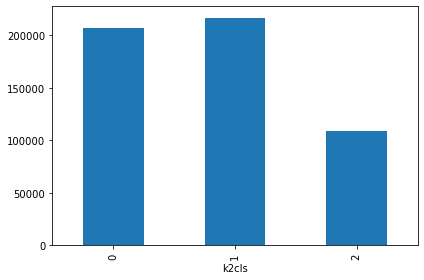

In [15]:
_ = k2sizes.plot.bar()

In [16]:
# Group table by cluster label, keep the variables used 
# for clustering, and obtain their mean
clustering_var = ['DRIVER_AGE','DRIVER_SEX','CRASH_MONTH', 'CRASH_DAY_OF_WEEK', 'CRASH_HOUR', 'NUM_UNITS',
       'ROAD_DEFECT', 'ROADWAY_SURFACE_COND', 'TRAFFICWAY_TYPE',
       'FIRST_CRASH_TYPE', 'POSTED_SPEED_LIMIT', 'LIGHTING_CONDITION',
       'WEATHER_CONDITION', 'DEVICE_CONDITION', 'TRAFFIC_CONTROL_DEVICE',
       'ALIGNMENT', 'STREET_DIRECTION']

k2means =crash_pca.groupby('k2cls')[clustering_var].mean()
k2means.T.round(3)

k2cls,0,1,2
DRIVER_AGE,42.875,27.948,60.744
DRIVER_SEX,0.725,0.786,0.690
CRASH_MONTH,6.731,6.733,6.776
CRASH_DAY_OF_WEEK,4.154,4.140,4.159
CRASH_HOUR,13.343,13.441,13.397
NUM_UNITS,2.056,2.043,1.999
ROAD_DEFECT,0.859,0.855,0.859
ROADWAY_SURFACE_COND,1.310,1.324,1.269
TRAFFICWAY_TYPE,4.205,4.237,4.078
FIRST_CRASH_TYPE,2.996,3.023,3.082


In [17]:
# Group table by cluster label, keep the variables used 
# for clustering, and obtain their descriptive summary

k2desc = crash_pca.groupby('k2cls')[clustering_var].describe()
# Loop over each cluster and print a table with descriptives
for cluster in k2desc.T:
    print('\n\t---------\n\tCluster %i'%cluster)
    print(k2desc.T[cluster].unstack())


	---------
	Cluster 0
                           count       mean       std   min   25%   50%   75%  \
DRIVER_AGE              206793.0  42.874875  4.522707  36.0  39.0  43.0  47.0   
DRIVER_SEX              206793.0   0.724788  0.733310   0.0   0.0   1.0   1.0   
CRASH_MONTH             206793.0   6.730934  3.399135   1.0   4.0   7.0  10.0   
CRASH_DAY_OF_WEEK       206793.0   4.154497  1.930603   1.0   3.0   4.0   6.0   
CRASH_HOUR              206793.0  13.343309  5.142786   0.0  10.0  14.0  17.0   
NUM_UNITS               206793.0   2.056457  0.429606   1.0   2.0   2.0   2.0   
ROAD_DEFECT             206793.0   0.858864  0.389763   0.0   1.0   1.0   1.0   
ROADWAY_SURFACE_COND    206793.0   1.309691  0.834954   0.0   1.0   1.0   1.0   
TRAFFICWAY_TYPE         206793.0   4.205186  2.123886   1.0   2.0   5.0   5.0   
FIRST_CRASH_TYPE        206793.0   2.995503  2.532389   0.0   1.0   3.0   3.0   
POSTED_SPEED_LIMIT      206793.0  29.018622  5.684241   0.0  30.0  30.0  30.0   
LIGHT

In [18]:
# Index db on cluster ID
tidy_db = crash_pca.set_index('k2cls')
# Keep only variables used for clustering
tidy_db = tidy_db[clustering_var]
# Stack column names into a column, obtaining 
# a "long" version of the dataset
tidy_db = tidy_db.stack()
# Take indices into proper columns
tidy_db = tidy_db.reset_index()
# Rename column names
tidy_db = tidy_db.rename(columns={
                        'level_1': 'Attribute', 
                        0: 'Values'})
# Check out result
tidy_db.head()

,k2cls,Attribute,Values
0,0,DRIVER_AGE,51
1,0,DRIVER_SEX,2
2,0,CRASH_MONTH,11
3,0,CRASH_DAY_OF_WEEK,2
4,0,CRASH_HOUR,13


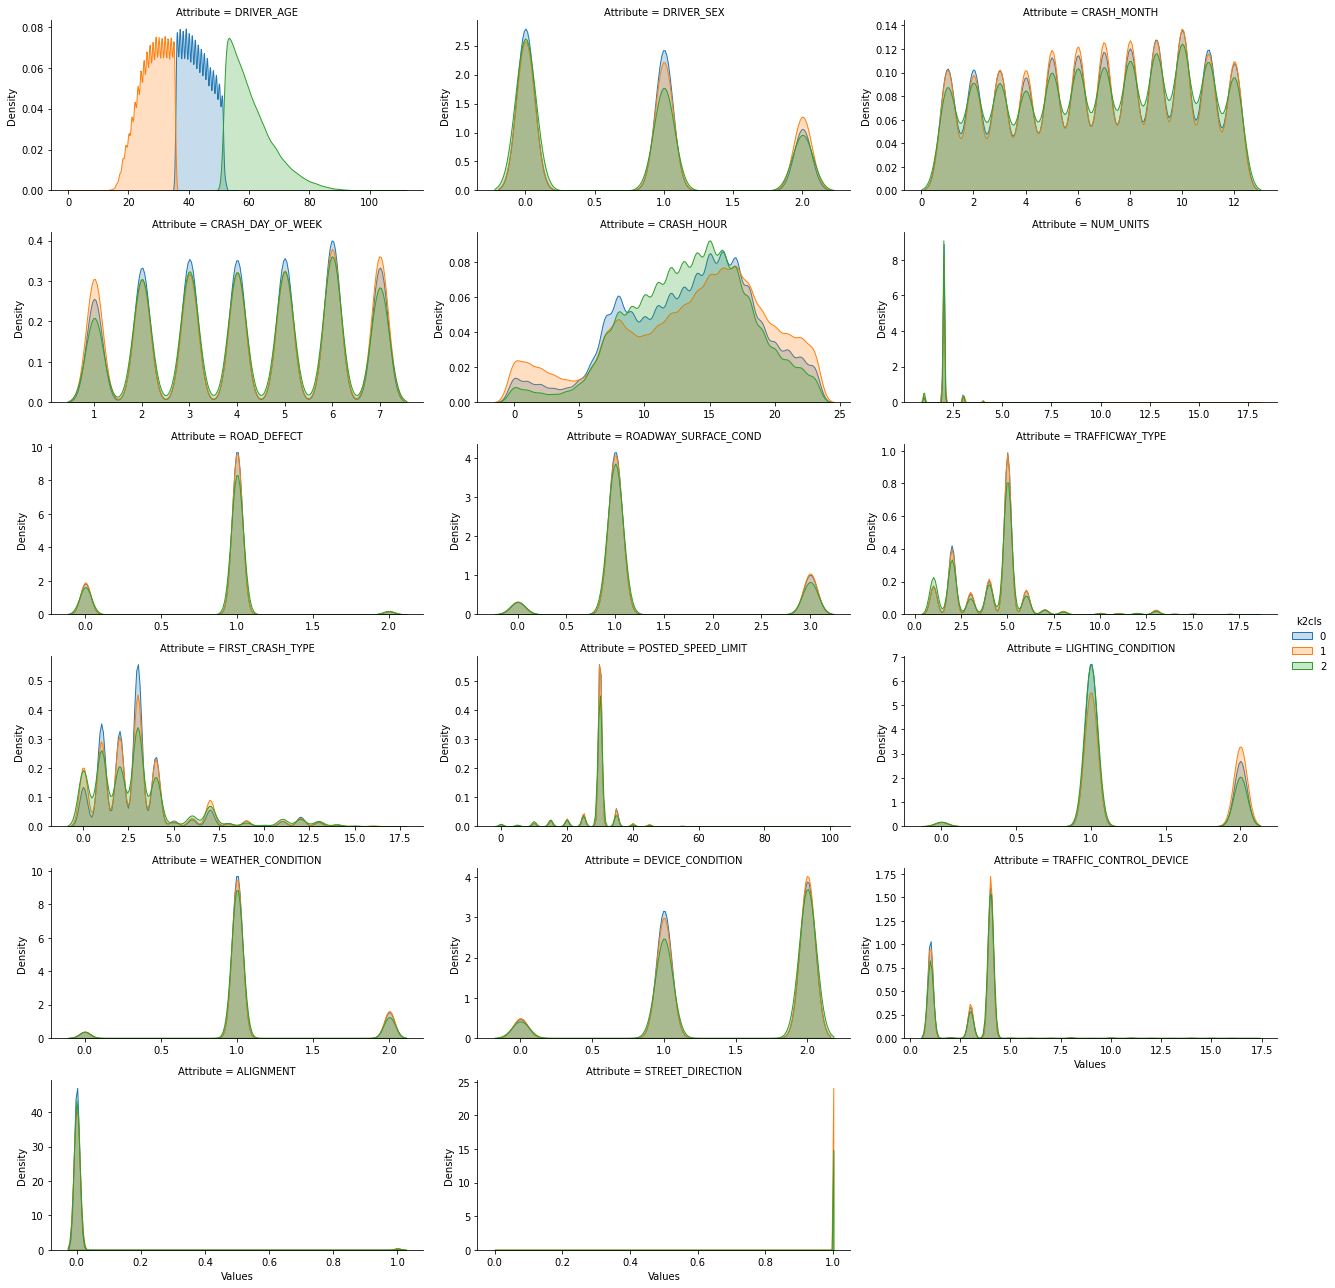

In [19]:
# face plot K=3
import seaborn
# Setup the facets
facets = seaborn.FacetGrid(data=tidy_db, col='Attribute', hue='k2cls', \
                  sharey=False, sharex=False, aspect=2, col_wrap=3)
# Build the plot from `sns.kdeplot`
_ = facets.map(seaborn.kdeplot, 'Values', shade=True).add_legend()


### 4 Radar Chart K=4

In [ ]:
# select the variables for Radar Chart
k2means_test = k2means.copy()
k2means_test = k2means_test[['DRIVER_AGE','DRIVER_SEX','CRASH_MONTH', 'CRASH_DAY_OF_WEEK', 'CRASH_HOUR',
       'NUM_UNITS', 'POSTED_SPEED_LIMIT']]

In [28]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

ValueError: The number of FixedLocator locations (8), usually from a call to set_ticks, does not match the number of ticklabels (7).

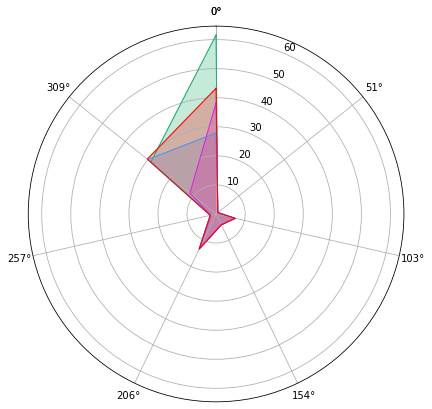

In [35]:
# Each attribute we'll plot in the radar chart.
labels = ['DRIVER_AGE', 'DRIVER_SEX','CRASH_MONTH', 'CRASH_DAY_OF_WEEK', 'CRASH_HOUR',
       'NUM_UNITS', 'POSTED_SPEED_LIMIT']

# Number of variables we're plotting.
num_vars = len(labels)

# Split the circle into even parts and save the angles
# so we know where to put each axis.
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
angles += angles[:1]

# ax = plt.subplot(polar=True)
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

# Helper function to plot each car on the radar chart.
def add_to_radar(car_model, color):
  values = k2means_test.loc[car_model].tolist()
  values += values[:1]
  ax.plot(angles, values, color=color, linewidth=1, label=car_model)
  ax.fill(angles, values, color=color, alpha=0.25)

# Add each car to the chart.
add_to_radar(0, '#1aaf6c')
add_to_radar(1, '#429bf4')
add_to_radar(2, '#d42cea')
add_to_radar(3, '#ff0000')

# Fix axis to go in the right order and start at 12 o'clock.
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)


# Draw axis lines for each angle and label.
ax.set_thetagrids(np.degrees(angles), labels)

# Go through labels and adjust alignment based on where
# it is in the circle.
for label, angle in zip(ax.get_xticklabels(), angles):
  if angle in (0, np.pi):
    label.set_horizontalalignment('center')
  elif 0 < angle < np.pi:
    label.set_horizontalalignment('left')
  else:
    label.set_horizontalalignment('right')

# Ensure radar goes from 0 to 100.
ax.set_ylim(0, 100)
# You can also set gridlines manually like this:
# ax.set_rgrids([20, 40, 60, 80, 100])

# Set position of y-labels (0-100) to be in the middle
# of the first two axes.
ax.set_rlabel_position(180 / num_vars)

# Add some custom styling.
# Change the color of the tick labels.
ax.tick_params(colors='#222222')
# Make the y-axis (0-100) labels smaller.
ax.tick_params(axis='y', labelsize=7)
# Change the color of the circular gridlines.
ax.grid(color='#AAAAAA')
# Change the color of the outermost gridline (the spine).
ax.spines['polar'].set_color('#222222')
# Change the background color inside the circle itself.
ax.set_facecolor('#FAFAFA')

# Add title.
ax.set_title('Comparing Cars Across Dimensions', y=1.08)

# Add a legend as well.
ax.legend(loc='bottom right', bbox_to_anchor=(1.3, 1.1))